<a href="https://colab.research.google.com/github/jambinoid/perceptron/blob/master/task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Самостоятельное задание 1.
##Написать аналогичный алгоритм для решения операции логического И (&).

Импортируем библиотеку numpy

In [ ]:
import numpy as np

Реализация простейшего перцептрона с помощью ООП

In [ ]:
class SimplePerceptron():
    # Пороговая функция активации
    activate = lambda self,sum: 0 if sum < 0 else 1

    def __init__(self, n_entries):
        # Задаем начальные веса
        self.weights = np.random.rand(n_entries + 1)

    # Функция обучения модели
    def fit(self, data, expected_values, learning_rate):
        # Добавляем смещение
        data = np.append(data, np.ones((data.shape[0], 1), dtype=data.dtype), axis=1)
        # Обучаем модель, изменяя веса
        for x, expected in zip(data, expected_values):
            error = expected - self.activate(np.dot(x, self.weights))
            # сработает с массивами numpy, но не сработает со списками
            self.weights += learning_rate * error * x
        print(self.weights)

    # Функция предсказания
    def predict(self, data):
        # Добавляем смещение
        data = np.append(data, np.ones((data.shape[0], 1), dtype=data.dtype), axis=1)
        # Возвращаем предсказанные обученной моделью значения
        return np.array([self.activate(np.dot(x, self.weights)) for x in data])

Подготавливаем выборку

In [ ]:
X = np.array([[0, 0],
              [1, 0],
              [0, 1],
              [1, 1]])
print(X)

[[0 0]
 [1 0]
 [0 1]
 [1 1]]


In [ ]:
Y = np.array([0, 0, 0, 1])
print(Y)

[0 0 0 1]


Создаем и обучаем модель

In [ ]:
N = 200
lr = 2e-1
indices = [np.random.randint(X.shape[0]) for i in range(N)]
training_data = np.take(X, indices, axis=0)
training_values = np.take(Y, indices)

model = SimplePerceptron(n_entries=X.shape[1])
model.fit(training_data, training_values, lr)

[ 0.38271649  0.30126031 -0.41983958]


Предсказываем значения

In [ ]:
prediction = model.predict(X)
# Вывод результата тренировки
for x, y in zip(X, prediction):
    print("{} -> {}".format(x, y))

[0 0] -> 0
[1 0] -> 0
[0 1] -> 0
[1 1] -> 1


#Самостоятельное задание 2.
##Написать алгоритм для обучения перцептрона возводить в квадрат.
*то есть на вход будет подаваться число S и на выходе должно получиться Sˆ2.

Импортируем библиотеку numpy

In [14]:
import numpy as np
import matplotlib.pyplot as plt

Реализация многослойного перцептрона с помощью ООП (здесь будем использовать один скрытый слой)

In [51]:
# Однослойный перцептрон - всего лишь линейный классификатор
# Двухслойный перцептрон может аппроксимировать многие непрерывные функции
class MultiPerceptron():
    # Вариант с одним выходным нейроном
    def __init__(self, n_entries, n_neurons=3):
        # Задаем начальные веса (должен быть многомерный массив, для каждого слоя свои веса)
        self.weights = [
                        np.random.rand(n_neurons, n_entries + 1),  # набор весов первого слоя с двумя нейронами
                        np.random.rand(1, n_neurons),  # набор весов выходного слоя с одним нейроном
        ]
        print('Kernel:')
        for weights in self.weights:
            print()
            print('    ', end='')
            for w in weights:
                print(w, end=' ')
            print()
        self.era_id = 0

    # Изменяем веса
    def fit(self, data, expected_values, learning_rate, print_info=True):
        for x, expected in zip(data, expected_values):
            # История входов нейронов
            z = []
            # История выходов нейронов (для производной)
            y = []
            # Проходим по скрытым слоям
            for k in range(len(self.weights) - 1):
                # Выход слоя
                y.append([])
                # Добавляем смещение
                x = np.append(x, 1)
                # Добавляем вход в историю
                z.append(x)
                # Проходим по нейронам скрытого слоя k
                for i in range(len(self.weights[k])):
                    # Выход нейрона i
                    y[k].append(max((0, np.dot(x, self.weights[k][i]))))
                # Присваиваем x выход слоя, чтобы с этими данными мог работать следующий слой
                x = np.array(y[k])
            # Находим разность (ошибка = div ** 2, но она не нужна в обновлении весов)
            # Добавляем вход в историю
            z.append(x)
            y.append([np.dot(x, self.weights[-1][0])])
            div = expected - y[-1][-1]
            # Изменяем веса с помощью обратного прохода
            # Проходим по нейронам в выходном слое (один нейрон в нашем случае)
            delta = [[]]
            # Проходим по весам нейрона 0
            for j in range(len(self.weights[-1][0])):
                delta[0].append(-2 * div)
                self.weights[-1][0][j] -= learning_rate * delta[0][j] * z[-1][0]
            # Чтобы пересчитать веса предыдущего нейрона на основе весов следующих нейронов
            delta_next = np.array(delta)
            # Проходим по скрытым слоям в обратном направлении
            for k in range(len(self.weights) - 2, -1, -1):
                delta = []
                # Проходим по нейронам в скрытом слое k
                for i in range(len(self.weights[k])):
                    if y[k][i] != 0:
                        delta.append([])
                        # Проходим по весам нейрона i
                        for j in range(len(self.weights[k][i])):
                            # Обновляем вес j нерона i скрытого слоя k
                                delta[i].append(2 * np.sum(delta_next * self.weights[k + 1]))
                                self.weights[k][i][j] -= learning_rate * delta[i][j] * z[k][j]
                    else:
                        delta.append(np.zeros(len(self.weights[k][i])))
                    # Чтобы пересчитать веса предыдущего нейрона на основе весов следующих нейронов
                delta_next = np.array(delta)
        self.era_id += 1
        if print_info:
            print('Kernel:')
            for weights in self.weights:
                print('    ', end='')
                for w in weights:
                    print(w, end=' ')
                print()
            print(f'Era: {self.era_id}')

    # Функция предсказания
    def predict(self, data):
        res = []
        for x in data:
            # Проходим по скрытым слоям
            for k in range(len(self.weights) - 1):
                # Выход слоя
                y = []
                # Добавляем смещение
                x = np.append(x, 1)
                # Проходим по нейронам скрытого слоя
                for i in range(len(self.weights[k])):
                    # Выход нейрона i
                    y.append(max((0, np.dot(x, self.weights[k][i]))))
                # Присваиваем x выход слоя, чтобы с этими данными мог работать следующий слой
                x = np.array(y)
            res.append(np.dot(x, self.weights[-1][-1]))

        return np.array(res)

Обучающая выборка

In [61]:
N = 10
training_data = np.arange(-N, N, 0.02)
training_values = np.square(training_data)
print(training_data.shape)

(1000,)


Создаем модель

In [67]:
model = MultiPerceptron(n_entries=1, n_neurons=15)

Kernel:

    [0.08427764 0.89728323] [0.63055265 0.09488971] [0.90949313 0.14262996] [0.7516119  0.55077095] [0.58291194 0.1108898 ] [0.97234412 0.70931855] [0.97955932 0.22181103] [0.91824691 0.98017889] [0.00701301 0.69589254] [0.37343387 0.47004948] [0.52374795 0.91290907] [0.35242472 0.82955647] [0.47486436 0.46168378] [0.54218664 0.02971933] [0.55327504 0.42794432] 

    [0.13887476 0.06812004 0.90108717 0.0025014  0.8691907  0.73641641
 0.27781847 0.63369265 0.7051341  0.48287984 0.16942775 0.94068973
 0.6503821  0.07395428 0.10817872] 


Обучение модели

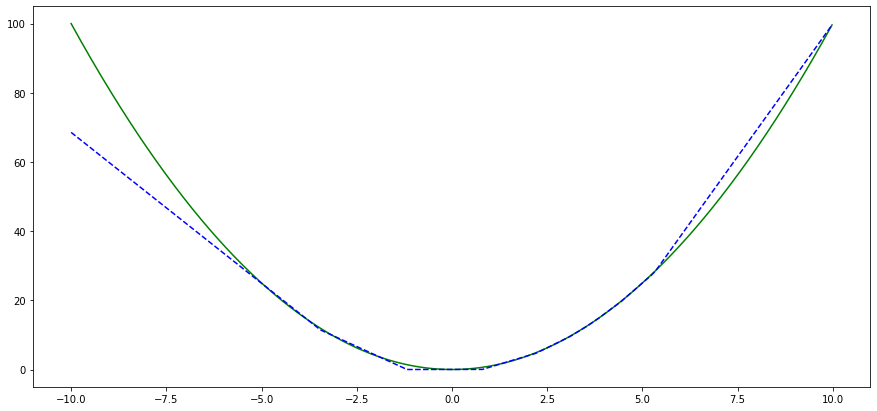

In [71]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
for i in range(10):
    model.fit(training_data, training_values, learning_rate=1e-5, print_info=False)

true_values = np.square(training_data)
pred_values = model.predict(training_data)

ax.plot(training_data, true_values, c='green')
ax.plot(training_data, pred_values, c='blue', linestyle='--')
fig.show()